![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de popularidad en canción

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desarrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de popularidad en canción".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/competitions/miad-2025-12-prediccion-popularidad-en-cancion).

## Datos para la predicción de popularidad en cancion

En este proyecto se usará el conjunto de datos de datos de popularidad en canciones, donde cada observación representa una canción y se tienen variables como: duración de la canción, acusticidad y tempo, entre otras. El objetivo es predecir qué tan popular es la canción. Para más detalles puede visitar el siguiente enlace: [datos](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
# Importación librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [31]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTrain_Spotify.csv')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTest_Spotify.csv', index_col=0)

# EXPLORACION Y VISUALIZACION DE DATOS

In [32]:
# Visualización datos de entrenamiento
dataTraining.head()

Unnamed: 0                track_id            artists  \
0           0  7hUhmkALyQ8SX9mJs5XI3D   Love and Rockets   
1           1  5x59U89ZnjZXuNAAlc8X1u   Filippa Giordano   
2           2  70Vng5jLzoJLmeLu3ayBQq      Susumu Yokota   
3           3  1cRfzLJapgtwJ61xszs37b  Franz Liszt;YUNDI   
4           4  47d5lYjbiMy0EdMRV8lRou            Scooter   

             album_name                              track_name  duration_ms  \
0      Love and Rockets                              Motorcycle       211533   
1      Filippa Giordano  Addio del passato - From "La traviata"       196000   
2                Symbol                      Purple Rose Minuet       216506   
3  Relajación y siestas            Liebeslied (Widmung), S. 566       218346   
4       Scooter Forever                            The Darkside       173160   

   explicit  danceability  energy  key  ...  mode  speechiness  acousticness  \
0     False         0.305  0.8490    9  ...     1       0.0549      0.000058   
1     False         0.287  0.1900    7  ...     0       0.0370      0.930000   
2     False         0.583  0.5090    1  ...     1       0.0362      0.777000   
3     False         0.163  0.0368    8  ...     1       0.0472      0.991000   
4     False         0.647  0.9210    2  ...     1       0.1850      0.000939   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  \
0          0.056700    0.4640   0.3200  141.793               4         goth   
1          0.000356    0.0834   0.1330   83.685               4        opera   
2          0.202000    0.1150   0.5440   90.459               3          idm   
3          0.899000    0.1070   0.0387   69.442               3    classical   
4          0.371000    0.1310   0.1710  137.981               4       techno   

  popularity  
0         22  
1         22  
2         37  
3          0  
4         27  

[5 rows x 21 columns]

In [33]:
# Visualización datos de test
dataTesting.head()


track_id                     artists  \
0  6KwkVtXm8OUp2XffN5k7lY            Hillsong Worship   
1  2dp5I5MJ8bQQHDoFaNRFtX                Internal Rot   
2  5avw06usmFkFrPjX8NxC40  Zhoobin Askarieh;Ali Sasha   
3  75hT0hvlESnDJstem0JgyR                 Bryan Adams   
4  4bY2oZGA5Br3pTE1Jd1IfY                  Nogizaka46   

                        album_name             track_name  duration_ms  \
0                    No Other Name          No Other Name       440247   
1                   Grieving Birth         Failed Organum        93933   
2             Noise A Noise 20.4-1  Save the Trees, Pt. 1       213578   
3  All I Want For Christmas Is You        Merry Christmas       151387   
4                       バレッタ TypeD                  月の大きさ       236293   

   explicit  danceability  energy  key  loudness  mode  speechiness  \
0     False         0.369   0.598    7    -6.984     1       0.0304   
1     False         0.171   0.997    7    -3.586     1       0.1180   
2     False         0.173   0.803    9   -10.071     0       0.1440   
3     False         0.683   0.511    6    -5.598     1       0.0279   
4     False         0.555   0.941    9    -3.294     0       0.0481   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  \
0       0.00511          0.000000     0.176   0.0466  148.014               4   
1       0.00521          0.801000     0.420   0.0294  122.223               4   
2       0.61300          0.001910     0.195   0.0887   75.564               3   
3       0.40600          0.000197     0.111   0.5980  109.991               3   
4       0.48400          0.000000     0.266   0.8130   92.487               4   

   track_genre  
0  world-music  
1    grindcore  
2      iranian  
3         rock  
4       j-idol

In [34]:
dataTraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        79800 non-null  int64  
 1   track_id          79800 non-null  object 
 2   artists           79800 non-null  object 
 3   album_name        79800 non-null  object 
 4   track_name        79800 non-null  object 
 5   duration_ms       79800 non-null  int64  
 6   explicit          79800 non-null  bool   
 7   danceability      79800 non-null  float64
 8   energy            79800 non-null  float64
 9   key               79800 non-null  int64  
 10  loudness          79800 non-null  float64
 11  mode              79800 non-null  int64  
 12  speechiness       79800 non-null  float64
 13  acousticness      79800 non-null  float64
 14  instrumentalness  79800 non-null  float64
 15  liveness          79800 non-null  float64
 16  valence           79800 non-null  float6

Se elimina la columna de índice redundante proveniente del dataset

In [35]:
dataTraining = dataTraining.drop(columns='Unnamed: 0')

In [36]:
for i in dataTraining.columns:
    print(f'{i} : {dataTraining[i].unique()} \n --------------------------------- \n')

track_id : ['7hUhmkALyQ8SX9mJs5XI3D' '5x59U89ZnjZXuNAAlc8X1u'
 '70Vng5jLzoJLmeLu3ayBQq' ... '0XL75lllKb1jTmEamqwVU6'
 '2VVWWwQ3FiWnmbukTb6Kd3' '3nic2HyQ0wsLb6IUFWiWu9'] 
 --------------------------------- 

artists : ['Love and Rockets' 'Filippa Giordano' 'Susumu Yokota' ... 'Keskin'
 'Amilcare Ponchielli;Gothenburg Symphony Orchestra;Neeme Järvi'
 'S N U G;Dyrean'] 
 --------------------------------- 

album_name : ['Love and Rockets' 'Filippa Giordano' 'Symbol' ... 'A Matter of Time'
 'BOZGUN' 'I Will Wait'] 
 --------------------------------- 

track_name : ['Motorcycle' 'Addio del passato - From "La traviata"'
 'Purple Rose Minuet' ... 'La Gioconda / Act 3: Dance Of The Hours'
 'Time of India' 'Back Then'] 
 --------------------------------- 

duration_ms : [211533 196000 216506 ... 393160 240062 216841] 
 --------------------------------- 

explicit : [False  True] 
 --------------------------------- 

danceability : [0.305  0.287  0.583  ... 0.0854 0.0951 0.0885] 
 --------------

In [37]:
df_numericas = dataTraining.select_dtypes(include='number')
df_categoricas = dataTraining.select_dtypes(exclude='number')

In [38]:
df_numericas.describe()

duration_ms  danceability        energy           key      loudness  \
count  7.980000e+04  79800.000000  79800.000000  79800.000000  79800.000000   
mean   2.279022e+05      0.567318      0.641529      5.307043     -8.263741   
std    1.050599e+05      0.173110      0.251441      3.562186      5.035504   
min    1.338600e+04      0.000000      0.000019      0.000000    -49.307000   
25%    1.744360e+05      0.456000      0.472000      2.000000    -10.006000   
50%    2.128130e+05      0.581000      0.685000      5.000000     -7.012000   
75%    2.614260e+05      0.695000      0.854000      8.000000     -5.000000   
max    5.237295e+06      0.985000      1.000000     11.000000      4.532000   

               mode   speechiness  acousticness  instrumentalness  \
count  79800.000000  79800.000000  79800.000000      79800.000000   
mean       0.637732      0.084750      0.314979          0.157319   
std        0.480659      0.105657      0.332512          0.310792   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.035900      0.017000          0.000000   
50%        1.000000      0.049000      0.169000          0.000041   
75%        1.000000      0.084500      0.598000          0.050500   
max        1.000000      0.965000      0.996000          1.000000   

           liveness       valence         tempo  time_signature    popularity  
count  79800.000000  79800.000000  79800.000000    79800.000000  79800.000000  
mean       0.213313      0.474267    122.076559        3.902556     33.265301  
std        0.190075      0.259010     29.941937        0.434284     22.330871  
min        0.000000      0.000000      0.000000        0.000000      0.000000  
25%        0.097900      0.261000     99.081250        4.000000     17.000000  
50%        0.132000      0.464000    122.009000        4.000000     35.000000  
75%        0.273000      0.684000    140.054000        4.000000     50.000000  
max        1.000000      0.995000    222.605000        5.000000    100.000000

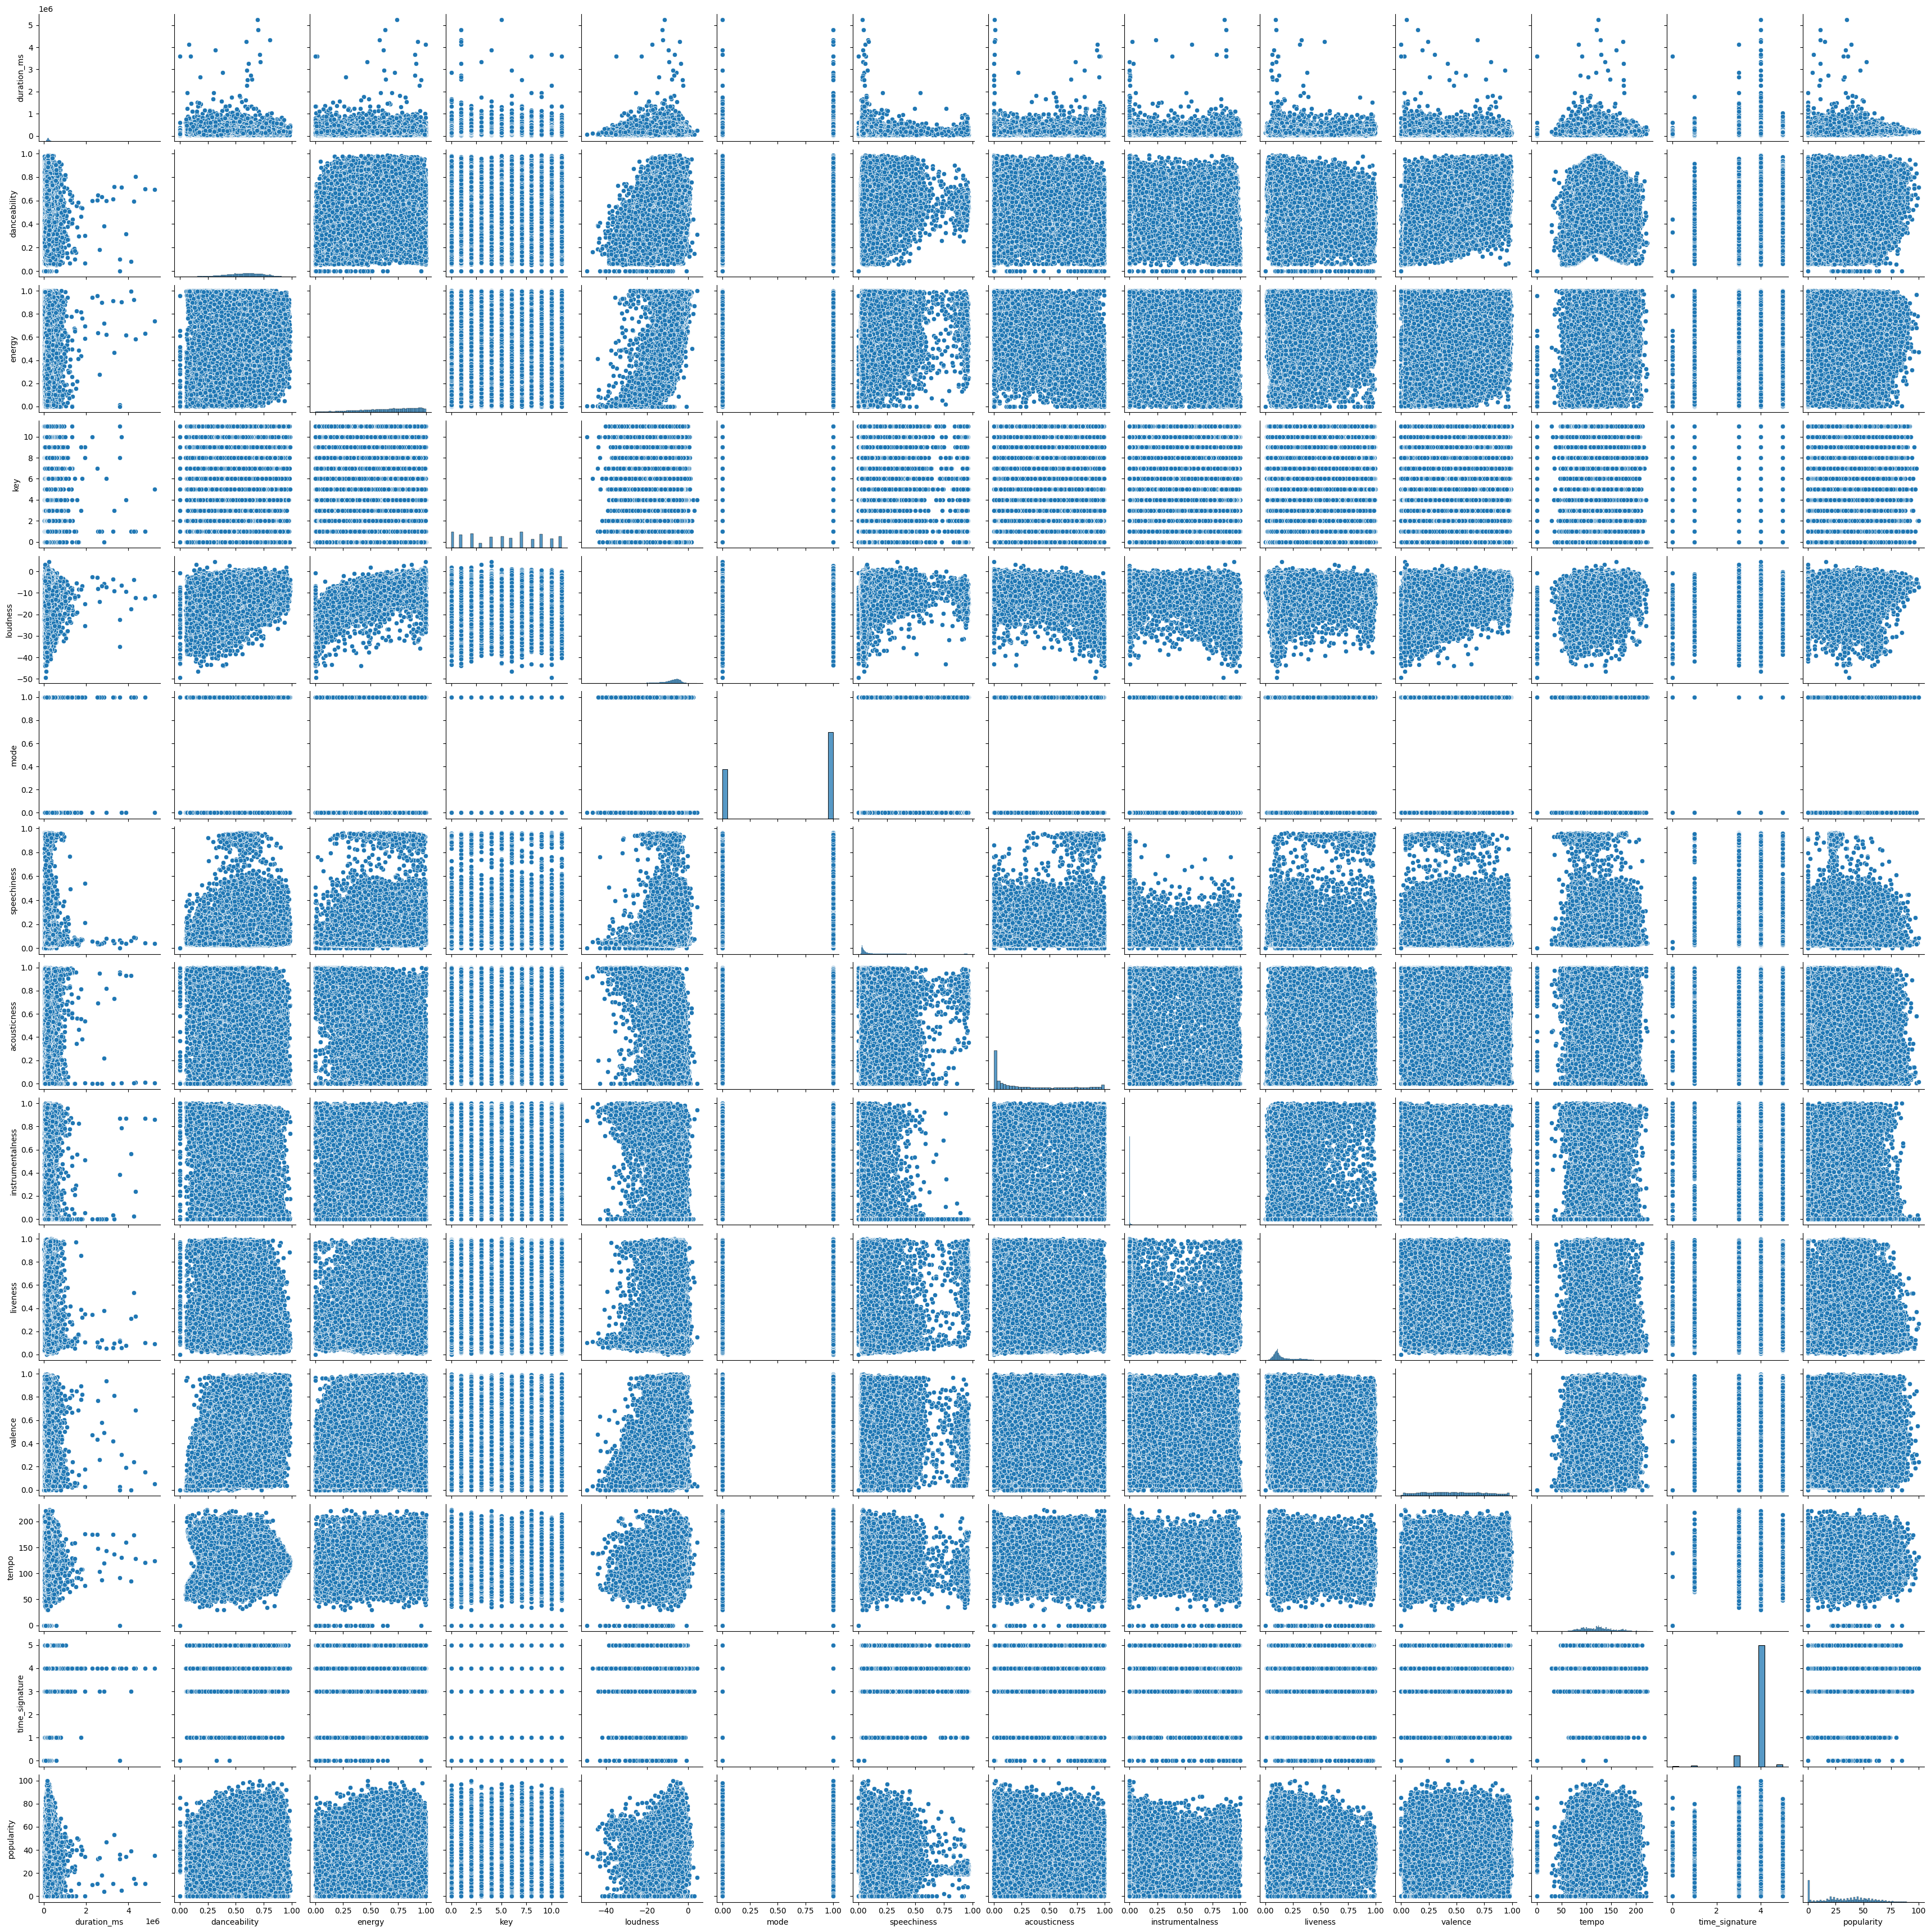

In [39]:
sns.pairplot(df_numericas, kind="scatter")
plt.show()

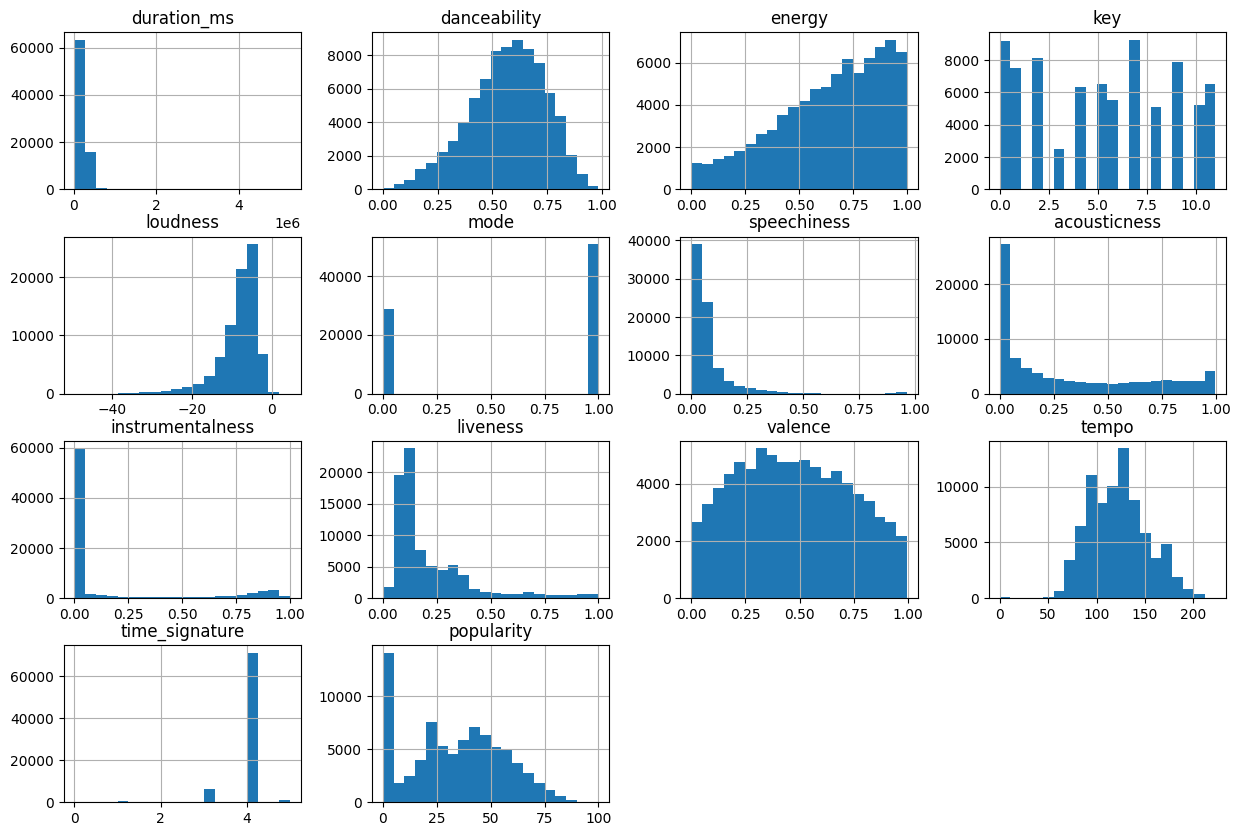

In [40]:
df_numericas.hist(bins=20, figsize=(15, 10))
plt.show()

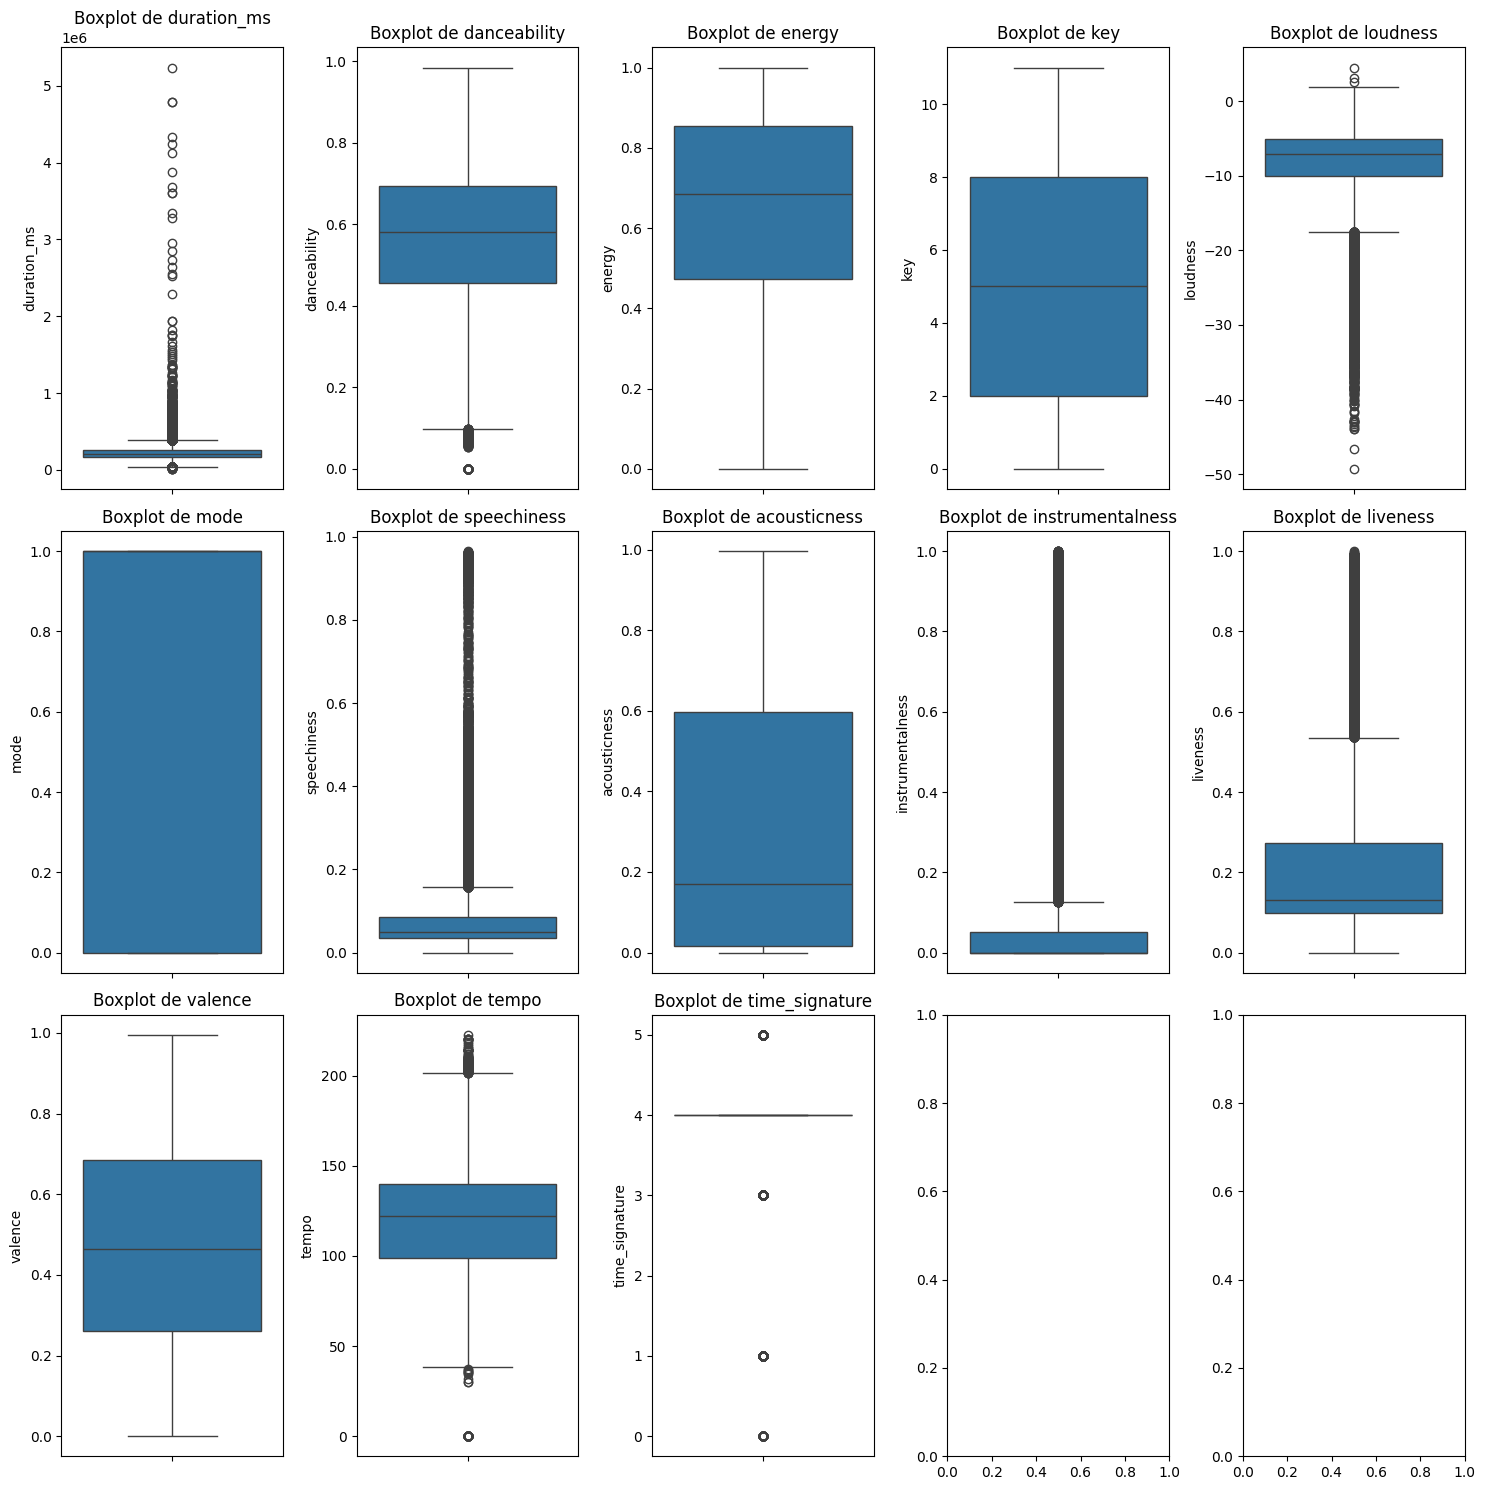

In [41]:
num_vars= df_numericas.drop(columns=['popularity'])
num_cols = 5
num_rows = 3

# num_vars
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))
axes = axes.flatten()
colors=sns.color_palette("husl", 8)
# Generar los boxplots
for i, col in enumerate(num_vars):
    sns.boxplot(y=df_numericas[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

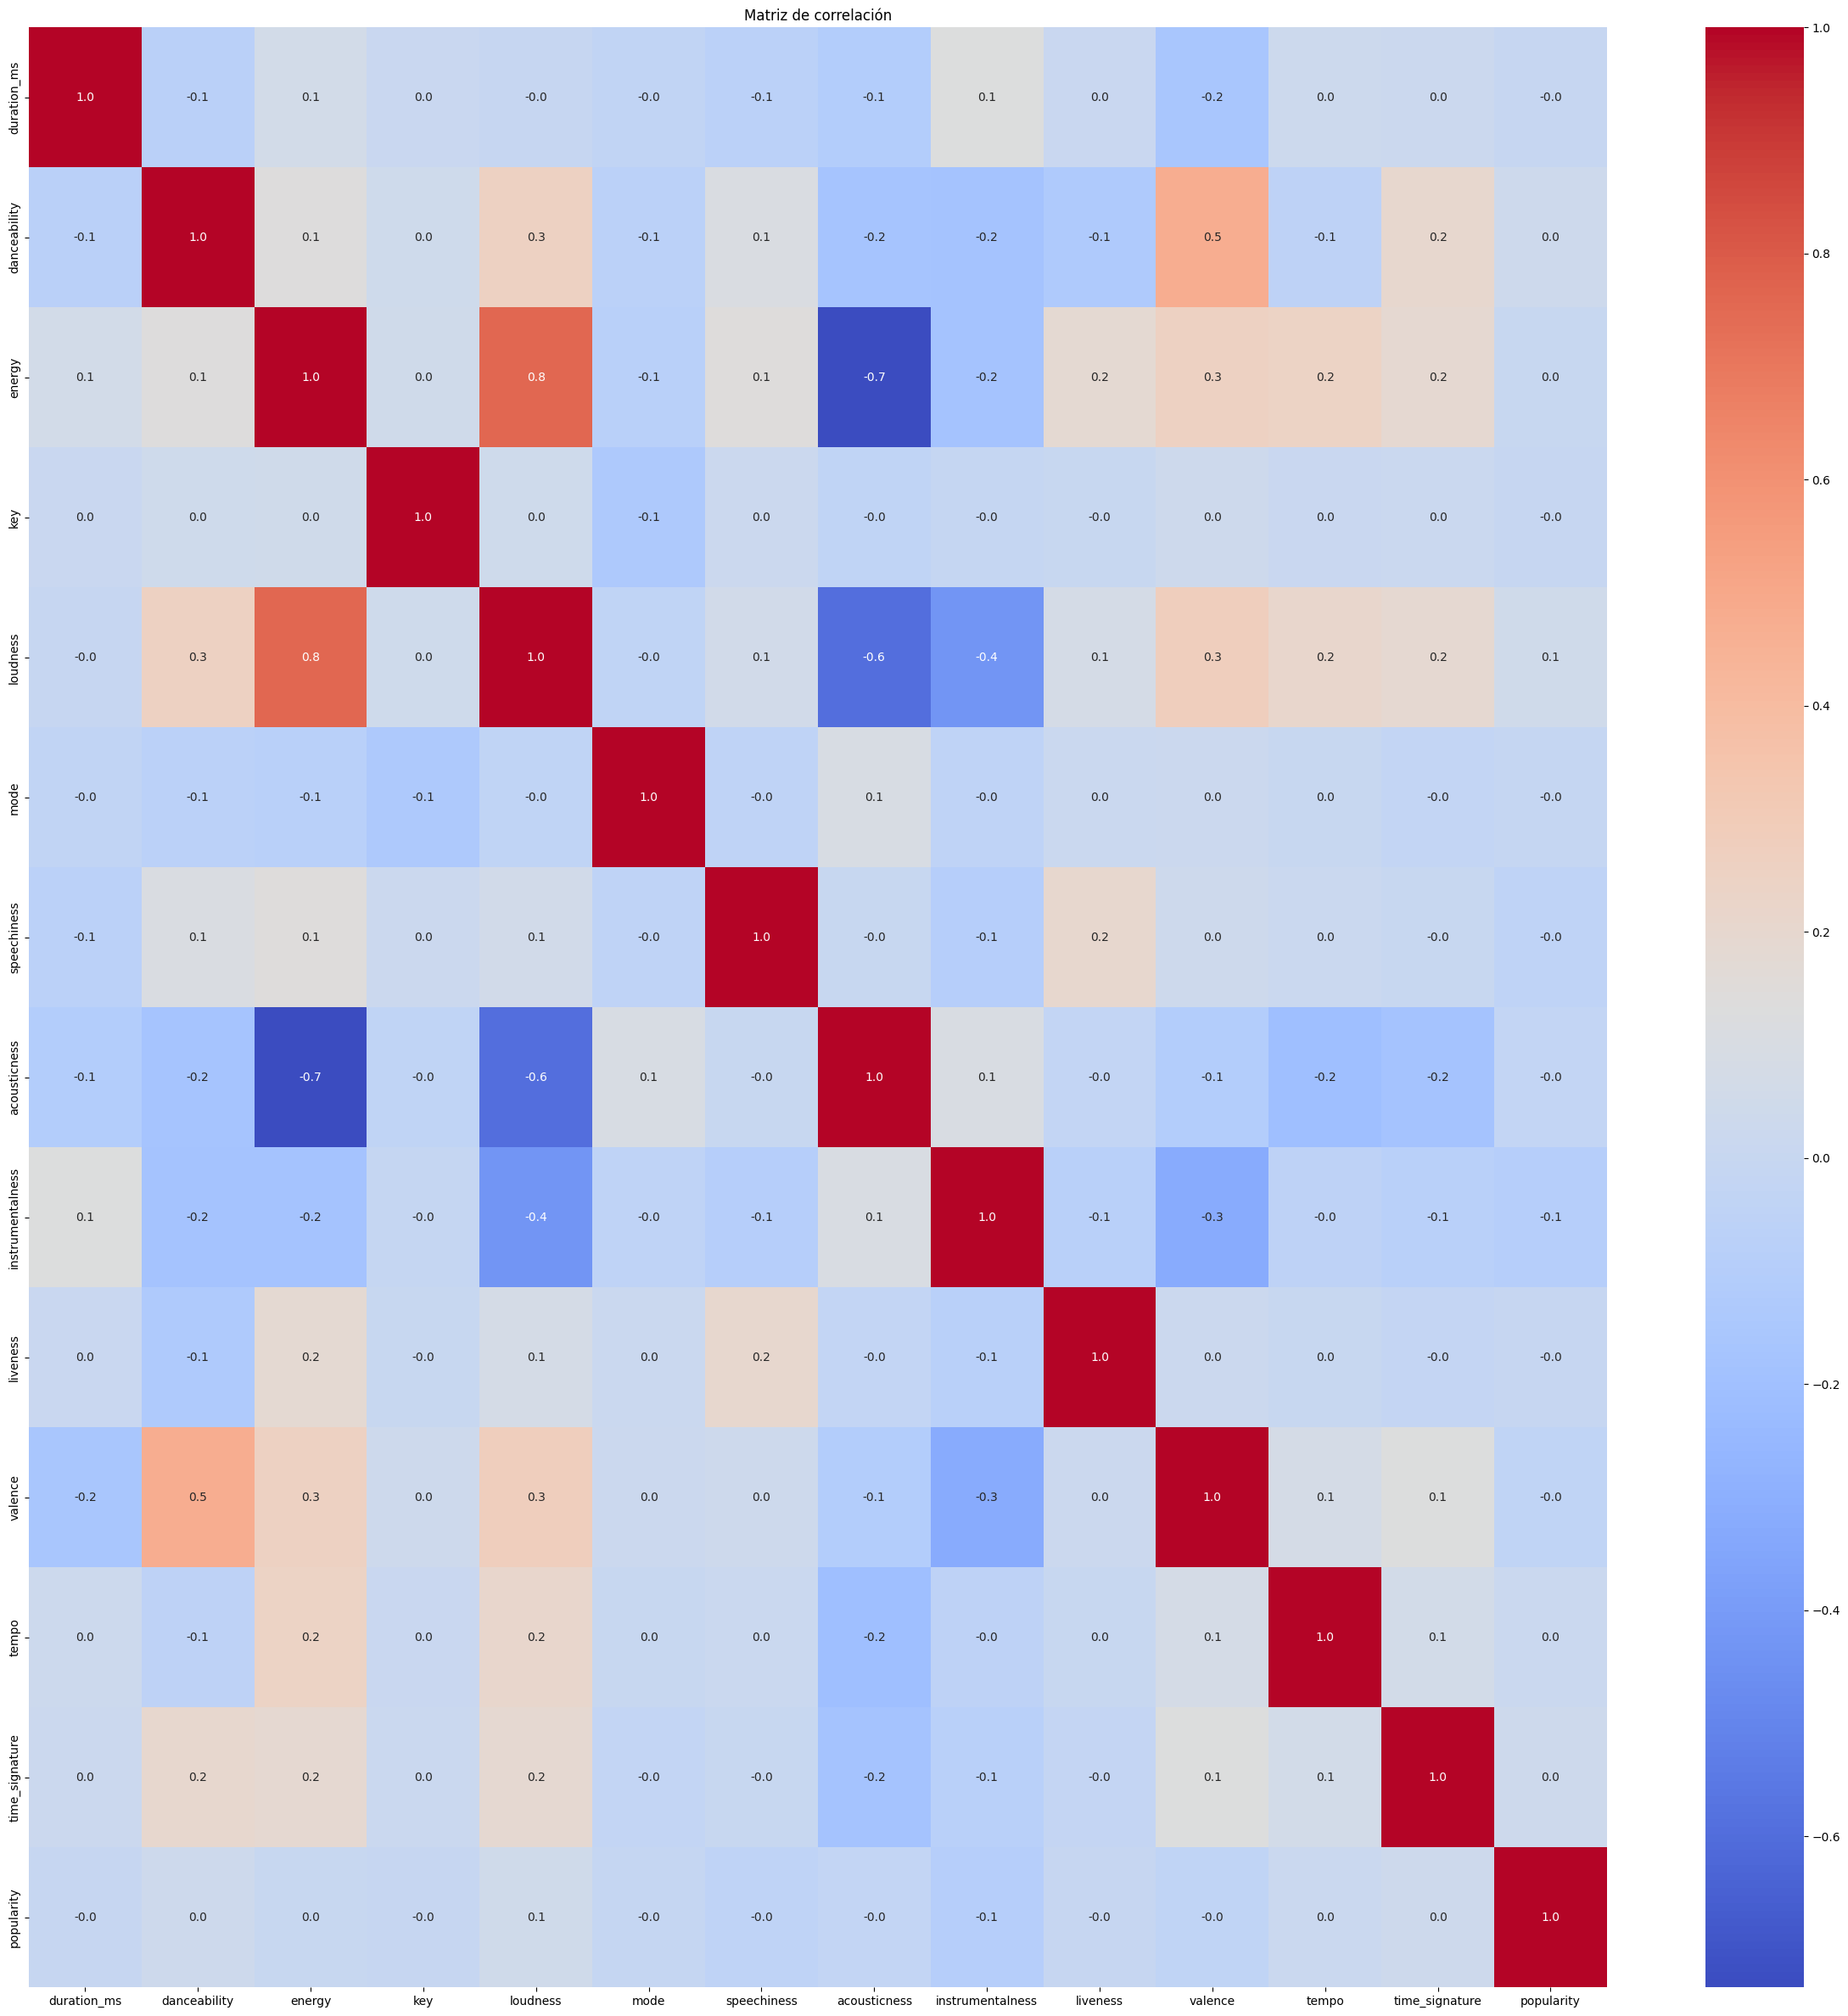

In [42]:
matriz_cor = df_numericas.corr()
plt.figure(figsize=(30,30))
sns.heatmap(matriz_cor,annot=True, cmap='coolwarm',fmt='.1f')
plt.title("Matriz de correlación")
plt.show()

## CONCLUSIONES VARIABLES NUMERICAS:
- Aunque hay algunas variables que muestran una correlación alta en el gráfico de correlación, como por ejemplo loudness y energy, en el gráfico de dispersión no se ve tan marcada esa correlación. Al estar ambas variables en una misma escala también puede aumentar el valor de la correlación.
- No se presentan valores atipicos en las variables numéricas, así como tampoco valores nulos, por lo que la data para este ejercicio se considera limpia
- Las variables tempo, loudness y danceability parecen tener una distribución normal

In [43]:
df_categoricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   track_id     79800 non-null  object
 1   artists      79800 non-null  object
 2   album_name   79800 non-null  object
 3   track_name   79800 non-null  object
 4   explicit     79800 non-null  bool  
 5   track_genre  79800 non-null  object
dtypes: bool(1), object(5)
memory usage: 3.1+ MB


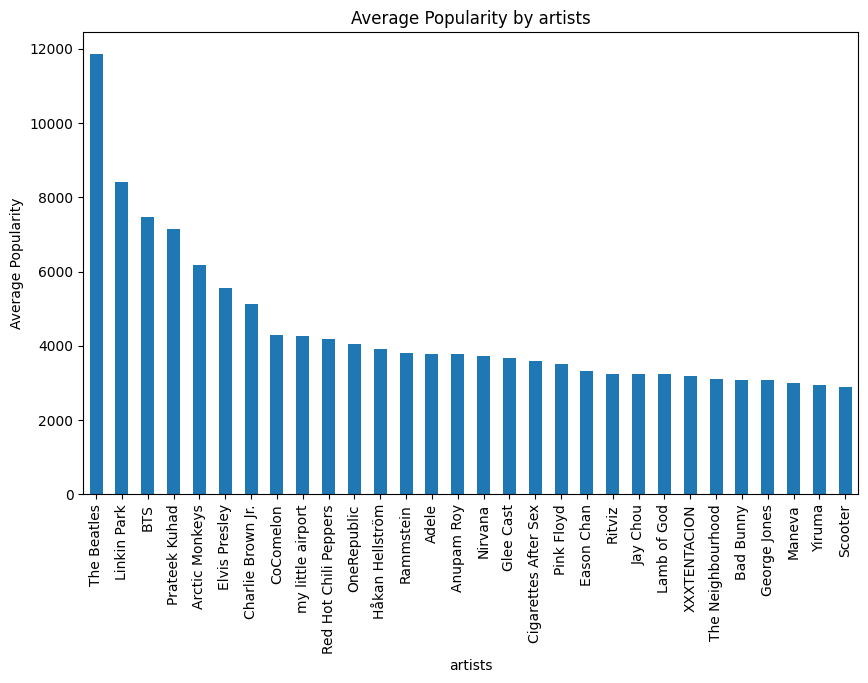

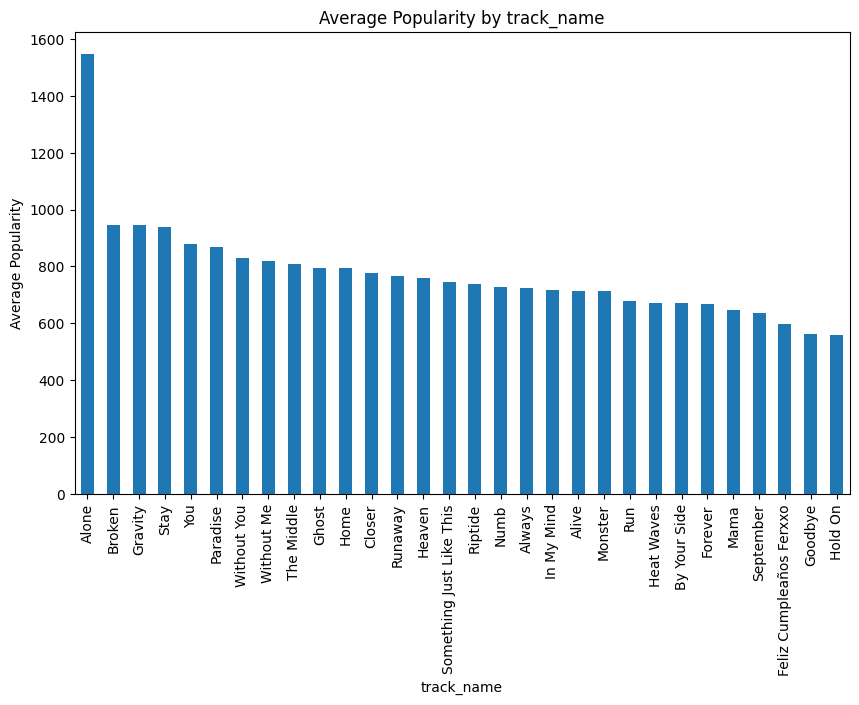

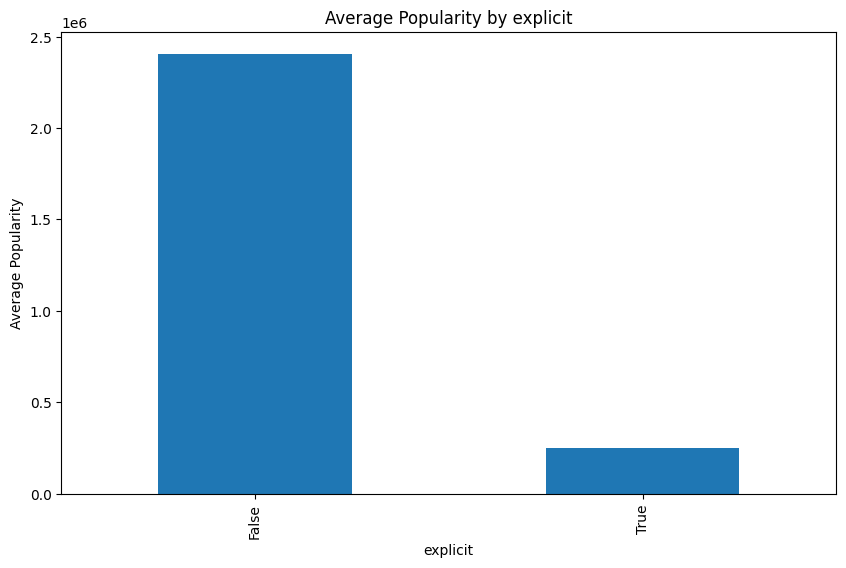

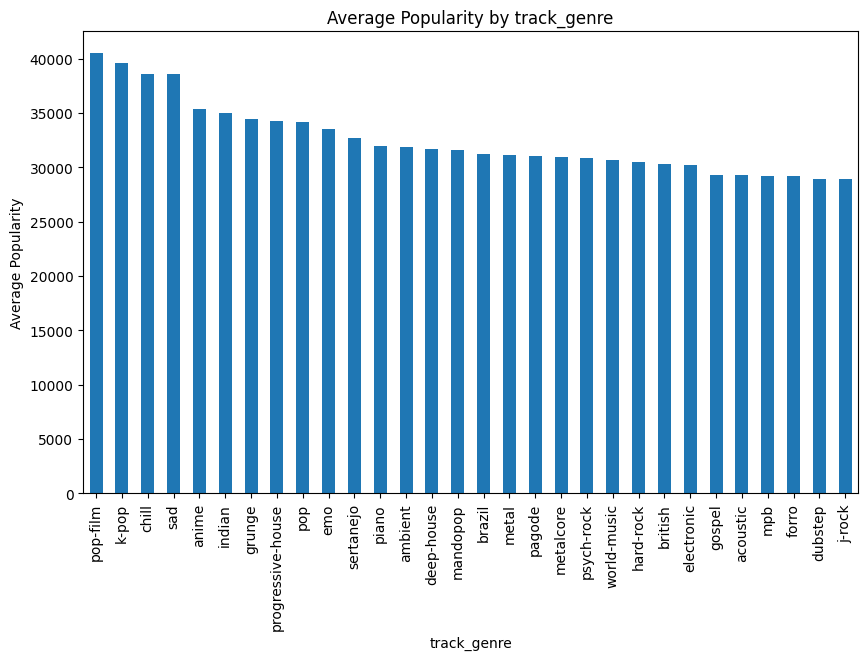

In [44]:
df = df_categoricas.drop(columns='track_id')

for i in df:
    genre_popularity = dataTraining.groupby(i).popularity.sum().sort_values(ascending=False)
    genre_popularity.head(30).plot(kind='bar', figsize=(10, 6), title=f'Average Popularity by {i}')
    plt.xlabel(i)
    plt.ylabel('Average Popularity')
    plt.show()

## CONCLUSIONES VARIABLES CATEGORICAS:
- Al visualizar las variables categoricas se puede concluir que efectivamente para cada una de ellas, excepto track_id, la popularidad si varía según el valor que tome la variable.
- Las variables album_name y track_name no aportan significancia al modelo de datos y puede viciar el mismo, dado que las canciones por lo general no repiten su nombre y una vez lanzado un album, el mismo no se vuelve a lanzar.

# PROCESAMIENTO DE DATOS

In [45]:
df_dataTraining = dataTraining.drop(columns=['track_id'])

In [46]:
# Se agrega una columna que cuenta el número de artistas para tratar de modelar las colaboraciones
df_dataTraining['num_artists'] = df_dataTraining['artists'].str.count(';') + 1

In [47]:
dataTraining.head()

track_id            artists            album_name  \
0  7hUhmkALyQ8SX9mJs5XI3D   Love and Rockets      Love and Rockets   
1  5x59U89ZnjZXuNAAlc8X1u   Filippa Giordano      Filippa Giordano   
2  70Vng5jLzoJLmeLu3ayBQq      Susumu Yokota                Symbol   
3  1cRfzLJapgtwJ61xszs37b  Franz Liszt;YUNDI  Relajación y siestas   
4  47d5lYjbiMy0EdMRV8lRou            Scooter       Scooter Forever   

                               track_name  duration_ms  explicit  \
0                              Motorcycle       211533     False   
1  Addio del passato - From "La traviata"       196000     False   
2                      Purple Rose Minuet       216506     False   
3            Liebeslied (Widmung), S. 566       218346     False   
4                            The Darkside       173160     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.305  0.8490    9   -10.795     1       0.0549      0.000058   
1         0.287  0.1900    7   -12.030     0       0.0370      0.930000   
2         0.583  0.5090    1    -9.661     1       0.0362      0.777000   
3         0.163  0.0368    8   -23.149     1       0.0472      0.991000   
4         0.647  0.9210    2    -7.294     1       0.1850      0.000939   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  \
0          0.056700    0.4640   0.3200  141.793               4        goth   
1          0.000356    0.0834   0.1330   83.685               4       opera   
2          0.202000    0.1150   0.5440   90.459               3         idm   
3          0.899000    0.1070   0.0387   69.442               3   classical   
4          0.371000    0.1310   0.1710  137.981               4      techno   

   popularity  
0          22  
1          22  
2          37  
3           0  
4          27

In [48]:
dataTraining['track_genre'].value_counts()

track_genre
progressive-house    738
sad                  737
world-music          729
singer-songwriter    727
swedish              726
                    ... 
party                673
goth                 672
house                669
grindcore            666
idm                  658
Name: count, Length: 114, dtype: int64

In [49]:
#Separación de datos en train y test
X = df_dataTraining.drop(columns='popularity')
y = df_dataTraining['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
# Se utilizar CatBoostEncoder ya que no aumenta la dimensionalidad y respeta la relación variable objetivo
# Asigna un único valor numérico por categoría basado en la media del target,
# en lugar de crear columnas 0/1 como el one-hot.
# Ofrece una escala continua donde categorías de efecto similar quedan cercanas, ayudando a modelos lineales
# y de árbol a aprender más rápido y con mejor generalización.
from category_encoders import CatBoostEncoder

encoder_cb = CatBoostEncoder(cols=[ 'track_genre','track_name','album_name', 'artists'])
encoder_cb.fit(X_train, y_train)

# Transformamos los datos
X_train = encoder_cb.transform(X_train)
X_test = encoder_cb.transform(X_test)

**NOTA** Aunque para futuros tracks no debería incluirse album name y track name, se incluyen ya que mejora con estos significativamente el desempeño del modelo en datos de test

In [51]:
# Transformación 1
for col in ['duration_ms','instrumentalness', 'num_artists']:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])

In [52]:
# Transformación 2
for col in ['speechiness','liveness']:
    X_train[col] = np.exp(X_train[col])
    X_test[col] = np.exp(X_test[col])

In [53]:
# Transformación 3
for col in ['tempo','album_name', 'track_name']:
    X_train[col] = np.square(X_train[col])
    X_test[col] = np.square(X_test[col])

In [ ]:
vars_log = ['duration_ms', 'instrumentalness', 'num_artists']
vars_exp = ['speechiness', 'liveness']
vars_sq  = ['tempo']
all_vars = vars_log + vars_exp + vars_sq


n_vars = len(all_vars)
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for ax, col in zip(axes, all_vars):
    before = df_dataTraining[col]
    after  = X_train[col]

    # Rango común de bins
    lo = min(before.min(), after.min())
    hi = max(before.max(), after.max())
    edges = np.linspace(lo, hi, 30)

    ax.hist(before, bins=edges, alpha=0.5, density=True, label='Original')
    ax.hist(after,  bins=edges, alpha=0.5, density=True, label='Transformado')
    ax.set_title(col)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Densidad')
    ax.legend()

for i in range(n_vars, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [46]:
# Escalamiento de datos
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

## CONCLUSIONES PROCESAMIENTO DE DATOS

- Se hace primero la separación en test y train para evitar overfitting en la muestra de train
- Se aplica log1p para reducir el sesgo a la derecha y estabilizar la varianza.
- Se aplica exp para amplificar las diferencias de valores concentrados en 0, además una escala un poco más grande permite al modelo detectar mejor variaciones pequeñas en los valores.
- Se aplica square para reducir la escala de rangos muy altos.
- Se realiza escalamiento de datos, aunque en muchas variables los valores oscilan entre 0 y 1, en otras variables si se presentan datos con valores más altos y el escalamiento nos ayuda con esa situación.

# CONSTRUCCION Y CALIBRACION DEL MODELO DE DATOS

## CALIBRACION DE ARBOLES

### BAGGING

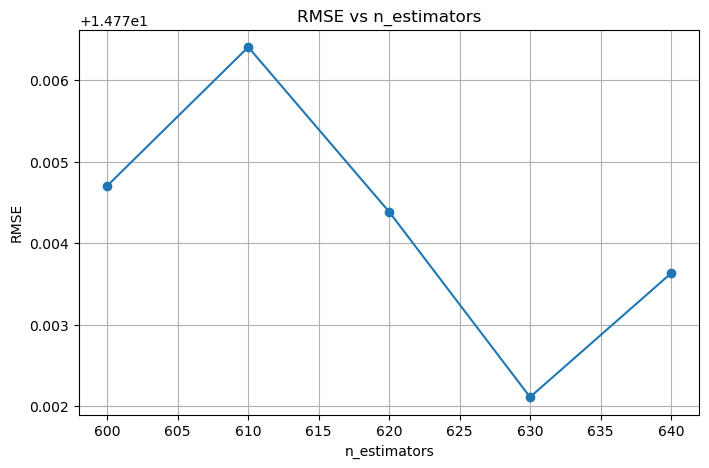

In [50]:
# Calibración de n_estimators
n_estimators_range = range(600, 641, 10)
rmse_scores = []

for n in n_estimators_range:
    model = BaggingRegressor(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    rmse_scores.append(rmse)
best_er_bg = n_estimators_range[np.argmin(rmse_scores)]
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_range, rmse_scores, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs n_estimators')
plt.grid(True)
plt.show()

In [24]:
# Calibración de max_samples
max_samples_range = np.linspace(0.1, 1.0, 10)
rmse_scores = []

for ms in max_samples_range:
    model = BaggingRegressor(n_estimators=175, max_samples=ms, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    rmse_scores.append(rmse)

plt.figure(figsize=(8, 5))
plt.plot(max_samples_range, rmse_scores, marker='o')
plt.xlabel('max_samples')
plt.ylabel('RMSE')
plt.title('RMSE vs max_samples')
plt.grid(True)
plt.show()

In [25]:
# Calibración de max_features
max_features_range = np.linspace(0.1, 1.0, 10)
rmse_scores = []

for mf in max_features_range:
    model = BaggingRegressor(n_estimators=175, max_samples=1.0, max_features=mf, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    rmse_scores.append(rmse)

plt.figure(figsize=(8, 5))
plt.plot(max_features_range, rmse_scores, marker='o')
plt.xlabel('max_features')
plt.ylabel('RMSE')
plt.title('RMSE vs max_features')
plt.grid(True)
plt.show()

### RANDOM FOREST

In [26]:
# Calibración n_estimators
rmse_scores = []
n_estimators_range = range(10, 201, 10)

for n in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    rmse_scores.append(rmse)

plt.figure(figsize=(8,5))
plt.plot(n_estimators_range, rmse_scores, marker='o')
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.title("Tuning n_estimators")
plt.grid(True)
plt.show()

In [27]:
# calibración de max_depth
rmse_scores = []
max_depth_range = range(1, 31)

for d in max_depth_range:
    model = RandomForestRegressor(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    rmse_scores.append(rmse)

plt.figure(figsize=(8,5))
plt.plot(max_depth_range, rmse_scores, marker='o')
plt.xlabel("max_depth")
plt.ylabel("RMSE")
plt.title("Tuning max_depth")
plt.grid(True)
plt.show()

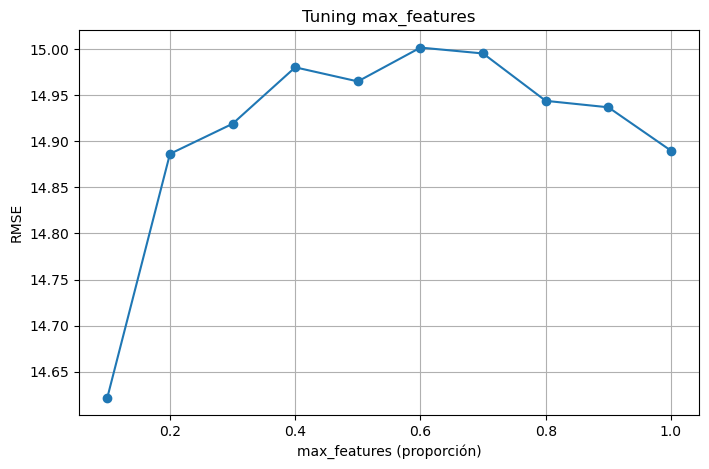

In [28]:
# Calibracíon de max_features
rmse_scores = []
max_features_range = np.linspace(0.1, 1.0, 10)

for f in max_features_range:
    model = RandomForestRegressor(max_features=f, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    rmse_scores.append(rmse)

plt.figure(figsize=(8,5))
plt.plot(max_features_range, rmse_scores, marker='o')
plt.xlabel("max_features (proporción)")
plt.ylabel("RMSE")
plt.title("Tuning max_features")
plt.grid(True)
plt.show()

### XGBoost

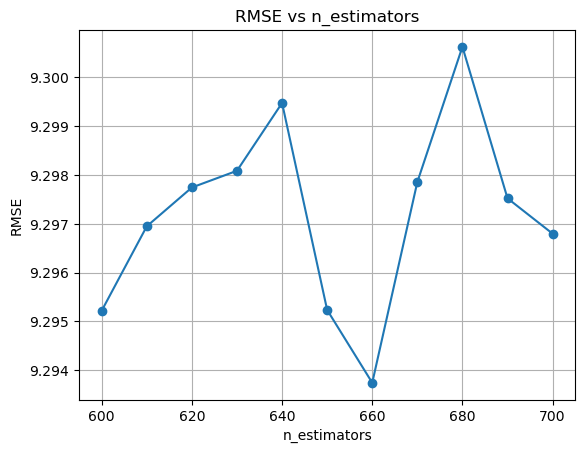

In [264]:
# Calibración n_estimators
n_estimators_range = range(600, 701, 10)
rmse_scores = []

for n in n_estimators_range:
    model = XGBRegressor(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    rmse_scores.append(rmse)
best_n_estimators = n_estimators_range[np.argmin(rmse_scores)]
plt.plot(n_estimators_range, rmse_scores, marker='o')
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.title("RMSE vs n_estimators")
plt.grid(True)
plt.show()

In [268]:
# Calibración learning_rate
learning_rates = np.linspace(0.01, 0.5, 10)
rmse_scores = []

for lr in learning_rates:
    model = XGBRegressor(n_estimators=best_n_estimators, learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    rmse_scores.append(rmse)
best_lr = learning_rates[np.argmin(rmse_scores)]
plt.plot(learning_rates, rmse_scores, marker='o')
plt.xlabel("learning_rate")
plt.ylabel("RMSE")
plt.title("RMSE vs learning_rate")
plt.grid(True)
plt.show()

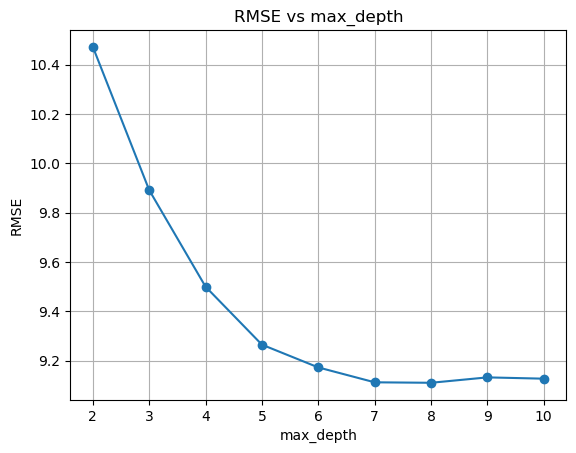

In [272]:
# Calibración max_depth
depths = range(2, 11)
rmse_scores = []

for d in depths:
    model = XGBRegressor(n_estimators=best_n_estimators, learning_rate=best_lr, max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    rmse_scores.append(rmse)
best_max_depth = depths[np.argmin(rmse_scores)]
plt.plot(depths, rmse_scores, marker='o')
plt.xlabel("max_depth")
plt.ylabel("RMSE")
plt.title("RMSE vs max_depth")
plt.grid(True)
plt.show()

**NOTA** Como al final el modelo que mejor desempeño dió fue el xgboost, entonces se recalibran los parametros con un calibrador más avanzado

In [68]:
# Optuna objective function
import optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 2900, 2900),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'max_depth': trial.suggest_int('max_depth', 12, 12),
        'tree_method': 'gpu_hist', 'predictor':'gpu_predictor',
        'random_state': 42
    }
    
    model = XGBRegressor(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds)**0.5
    return rmse

# Ejecutar la optimización
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=15)

# Mejor modelo
best_params = study.best_params
best_model = XGBRegressor(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)**0.5

print(f"Mejor RMSE con Optuna: {rmse:.4f}")
print("Mejores hiperparámetros:", best_params)

[I 2025-04-25 22:19:16,464] A new study created in memory with name: no-name-5c7d7560-9ab2-4a6d-a177-fef832bd4784
[I 2025-04-25 22:20:36,565] Trial 0 finished with value: 9.04340956336501 and parameters: {'n_estimators': 2900, 'learning_rate': 0.06787915884938846, 'max_depth': 12}. Best is trial 0 with value: 9.04340956336501.
[I 2025-04-25 22:22:11,733] Trial 1 finished with value: 8.998951321011226 and parameters: {'n_estimators': 2900, 'learning_rate': 0.04831569751573714, 'max_depth': 12}. Best is trial 1 with value: 8.998951321011226.
[I 2025-04-25 22:22:58,726] Trial 2 finished with value: 9.070122400570353 and parameters: {'n_estimators': 2900, 'learning_rate': 0.11832473457677549, 'max_depth': 12}. Best is trial 1 with value: 8.998951321011226.
[I 2025-04-25 22:24:31,829] Trial 3 finished with value: 8.987190031136635 and parameters: {'n_estimators': 2900, 'learning_rate': 0.020648649788986315, 'max_depth': 12}. Best is trial 3 with value: 8.987190031136635.
[I 2025-04-25 22:25

Mejor RMSE con Optuna: 8.9765
Mejores hiperparámetros: {'n_estimators': 2900, 'learning_rate': 0.019133953427042664, 'max_depth': 12}


### CONCLUSIONES CALIBRACION

- El tipo de error para calibrar los modelos fue el RMSE. Esto debido a que la distribución de la variable a predecir no cuenta con outliers y sus muestras, según el análisis descriptivo, refleja que está centrada a valores medios bajos (dada su media y percentiles) por lo cual con el RMSE lo que se buscó fue tener una medición del error más equilibrada y en la escala de los datos.
- Bagging:
  - El número calibrado de n_estimators es 640, a partir de este valor, el error se estabiliza
  - El número calibrado de max_samples es 1 con el menor error
  - El número calibrado de max_features es 0.6
- Random Forest:
  - El número calibrado de n_estimators es 500
  - El número calibrado de max_depth es 25
  - El número calibrado de max_features es 1.0
- XGBoost:
  - El número calibrado de n_estimators es 2900
  - El número calibrado de learning_rate es 0.019133953427042664
  - El número calibrado de max_depth es 12

## CONSTRUCCION ARBOLDES

### BAGGING

In [58]:
bg = BaggingRegressor(n_estimators=640, max_samples= 1.0, max_features= 0.6, random_state=42)
bg.fit(X_train, y_train)
y_pred_bg = bg.predict(X_test)
rmse_bg = mean_squared_error(y_test, y_pred_bg) ** 0.5

### RANDOM FOREST

In [61]:
rf = RandomForestRegressor(n_estimators=500, max_depth=25, max_features=1.0, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf) ** 0.5

### XGBOOST

In [ ]:
xb = XGBRegressor(n_estimators=2900, learning_rate=0.019133953427042664,
                  max_depth=12,tree_method='gpu_hist', redictor='gpu_predictor', random_state=42)
xb.fit(X_train, y_train)
y_pred_xb = xb.predict(X_test)
rmse_xb = mean_squared_error(y_test, y_pred_xb) ** 0.5

# EVALUACION DE MODELOS

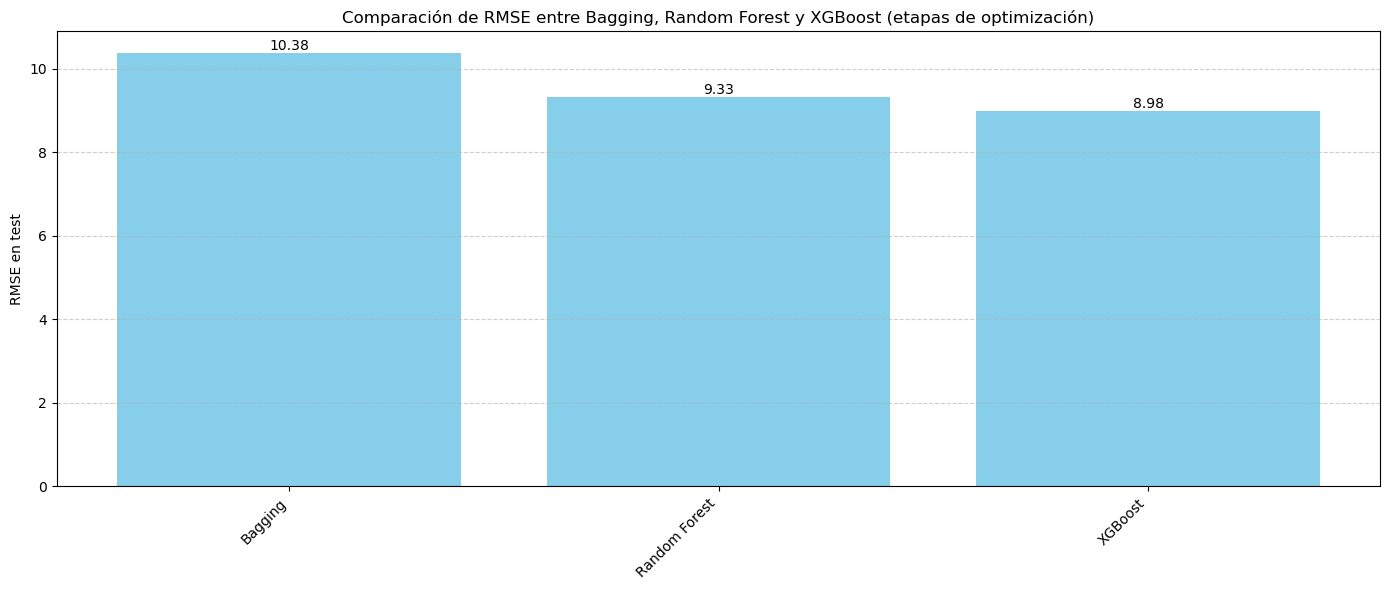

In [ ]:
labels = ['Bagging','Random Forest','XGBoost']
rmse_values = [rmse_bg, rmse_rf,rmse_xb]

plt.figure(figsize=(14, 6))
bars = plt.bar(labels, rmse_values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('RMSE en test')
plt.title('Comparación de RMSE entre Bagging, Random Forest y XGBoost (etapas de optimización)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval , f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# SELECCION DEL MODELO FINAL

In [36]:
dataTesting_f = dataTesting.drop(columns=['track_id', 'album_name', 'track_name'])


dataTesting_f['track_genre'] =  encoder_genre.transform(dataTesting_f['track_genre'])
dataTesting_f['artists'] =  encoder_artist.transform(dataTesting_f['artists'])

X_test_f = pd.DataFrame(scaler.transform(dataTesting_f), columns=dataTesting_f.columns, index=dataTesting_f.index)

# y_pred = bg.predict(X_test_f)
# y_pred = rf.predict(X_test_f)
y_pred = xb.predict(X_test_f)
y_pred = pd.Series(y_pred, name='Popularity')

In [37]:
y_pred.head()

0    48.552284
1    16.475193
2    -2.338095
3     0.148706
4    23.311718
Name: Popularity, dtype: float32

In [38]:
# Guardar predicciones en formato exigido en la competencia de kaggle
#y_pred.to_csv('test_submission_file_xb.csv', index_label='ID')

In [39]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
#np.random.seed(42)
#y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 100, index=dataTesting.index, columns=['Popularity'])

## API

**SE TIENE QUE GUARDAR EL MODELO ELEGIDO**

In [24]:
import joblib

#joblib.dump(bg, 'modelo_bagging.pkl')
joblib.dump(encoder_genre, 'encoder_genre.pkl')
joblib.dump(encoder_artist, 'encoder_artist.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [26]:
from sklearn.tree import DecisionTreeRegressor

arbol=DecisionTreeRegressor()
arbol.fit(X_train, y_train)

DecisionTreeRegressor()

In [27]:
joblib.dump(arbol, 'modelo_arbol.pkl')

['modelo_arbol.pkl']

In [28]:
X_test.head()


artists  duration_ms  explicit  danceability    energy       key  \
79644 -0.490452    -0.240371 -0.307325     -2.268868 -1.258650 -1.487215   
22495  0.045177     0.538512 -0.307325     -0.947601 -1.716001  0.475873   
54259  0.045177    -0.288216 -0.307325      0.137107  1.063898  0.475873   
4422   0.188973     1.415022 -0.307325      0.829474  0.467353  1.036755   
71095 -0.265184    -0.140398 -0.307325     -1.645738 -1.461475 -1.206774   

       loudness      mode  speechiness  acousticness  instrumentalness  \
79644 -1.025444  0.751713    -0.426262      0.946056          2.219667   
22495 -1.115192  0.751713    -0.499354      1.663073         -0.506343   
54259  0.852310  0.751713    -0.043931     -0.220971         -0.506223   
4422  -0.447933 -1.330295    -0.402835     -0.949849          1.524479   
71095 -0.698551  0.751713    -0.357854      1.855077         -0.503302   

       liveness   valence     tempo  time_signature  track_genre  
79644  1.812208 -1.639375 -0.090303       -2.050282    -0.968568  
22495 -0.317654 -0.519145  0.296015       -2.050282     1.468958  
54259 -0.639500  1.727503 -0.080323        0.226361    -0.229184  
4422  -0.666321 -0.538479 -0.032960        0.226361     0.991032  
71095 -0.606895 -0.824627 -1.015044       -2.050282    -0.155719

In [30]:
y_test.head(2)

79644    17
22495     7
Name: popularity, dtype: int64